# Project Insurance

In [98]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import skew            # Measure of Skewness
import seaborn as sns          
from scipy import stats


In [208]:
Insurance = pd.read_csv("insurance.csv")

In [209]:
Insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Performing EDA

In [5]:
# a. Shape of Data 

Insurance.shape

(1338, 7)

In [187]:
# b. Data Type of each column

Insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
# c. To check if there are any missing values.

Insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# d. 5 point Summary of numerical attributes

Insurance.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [0]:
#This gives the 5 point summary which is  -  Min, 25% (1st Quartile), 50%(Median), 75%(3rd Quartile), 
#Max for the numerical attributes.

In [10]:
# e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

(array([ 30., 127., 234., 319., 288., 195.,  96.,  32.,  14.,   3.]),
 array([15.96 , 19.677, 23.394, 27.111, 30.828, 34.545, 38.262, 41.979,
        45.696, 49.413, 53.13 ]),
 <a list of 10 Patch objects>)

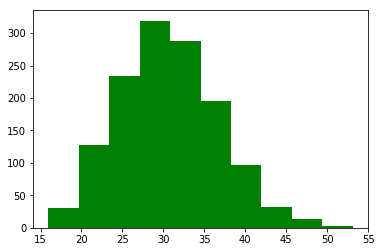

In [14]:
#BMI Distribution 
plt.hist(Insurance["bmi"], color='g', bins=10)

(array([222., 140., 109., 128., 102., 137., 144., 114., 128., 114.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <a list of 10 Patch objects>)

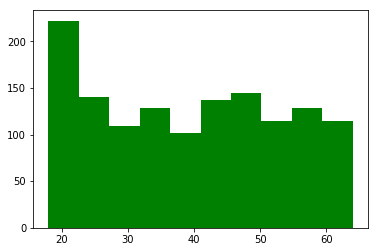

In [15]:
#Age Distribution 
plt.hist(Insurance["age"], color='g', bins=10)

(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <a list of 10 Patch objects>)

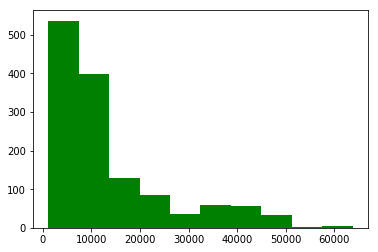

In [16]:
#Charges Distribution 
plt.hist(Insurance["charges"], color='g', bins=10)

# The distribution of Charges column is Right-Skewed

In [ ]:
# f. Measure of Skewness for "bmi", "age" and "charges" columns

In [28]:
print("Measure of Skew for BMI column : ", skew(Insurance['bmi']))
print("Measure of Skew for Age column: ", skew(Insurance['age']))
print("Measure of Skew for charges column : ", skew(Insurance['charges']))

#For Normal Distribution , the skew value is 0. Amongst 3 columns, 'charges' column is most skewed.

Measure of Skew for BMI column :  0.28372857291709386
Measure of Skew for Age column:  0.055610083072599126
Measure of Skew for charges column :  1.5141797118745743


In [ ]:
# g. Checking the presence of Outliers for "bmi" , "age" and "charges" column

In [ ]:
# We can check the presence of outliers by plotting Box Plots for each of these columns.

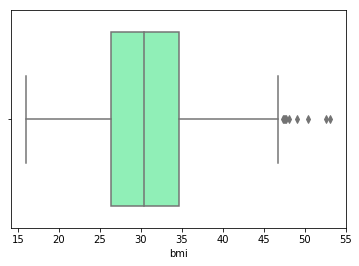

In [13]:
#Box Plot - "bmi" colmun
sns.boxplot(x="bmi", data=Insurance, palette='rainbow')

#By looking at the distribution, there are high outliers in "bmi" column

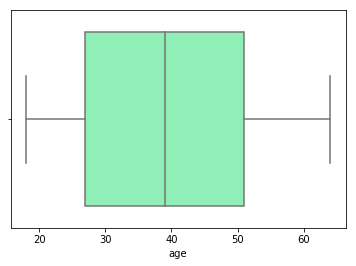

In [14]:
#Box Plot - "Age" column
sns.boxplot(x="age", data=Insurance, palette='rainbow')

#By looking as below distribution, there are no outliers in "Age" column

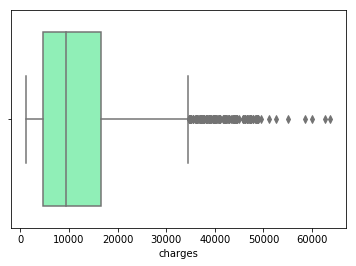

In [15]:
#Box Plot - "charges" column
sns.boxplot(x="charges", data=Insurance, palette='rainbow')

#By looking at below distribution, there are many high outliers in "charges" column

In [16]:
# h. Distribution of Categorical columns including Children
#In the Insurance dataset,"sex", "smoker" and "region" are categorical columns  

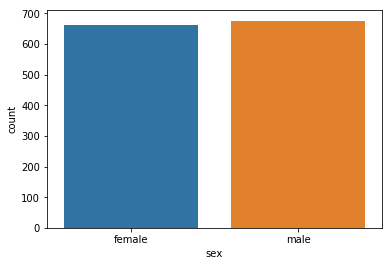

In [18]:
#Bar Plot
#Insurance["sex"].value_counts().plot.bar()

#Count Plot
sns.countplot(x='sex', data=Insurance)

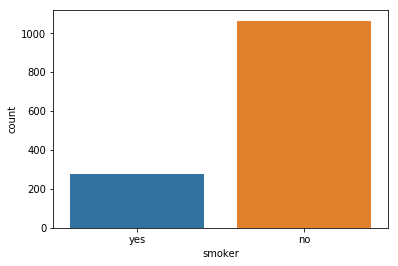

In [22]:
sns.countplot(x='smoker', data=Insurance)

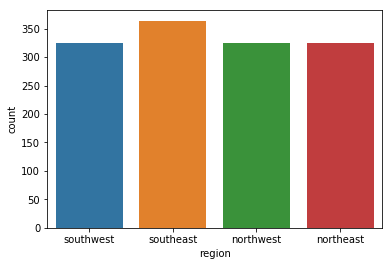

In [23]:
sns.countplot(x='region', data=Insurance)

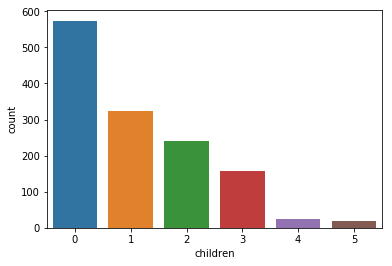

In [24]:
sns.countplot(x='children', data=Insurance)

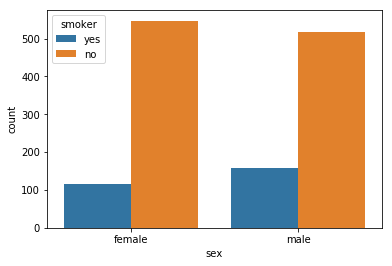

In [31]:
#We can also compare the relationships between the categorical columns
sns.countplot(x="sex", data=Insurance, hue='smoker')

In [169]:
# Similarly, below graphs can be plotted :

#sns.countplot(x="region", data=Insurance, hue='sex')
#sns.countplot(x="sex", data=Insurance, hue='children')

In [43]:
# i. Pair Plot to include all the columns of data 

#Pairplot plots all the numerical attributes. Categorical attributes can be used in "Hue"

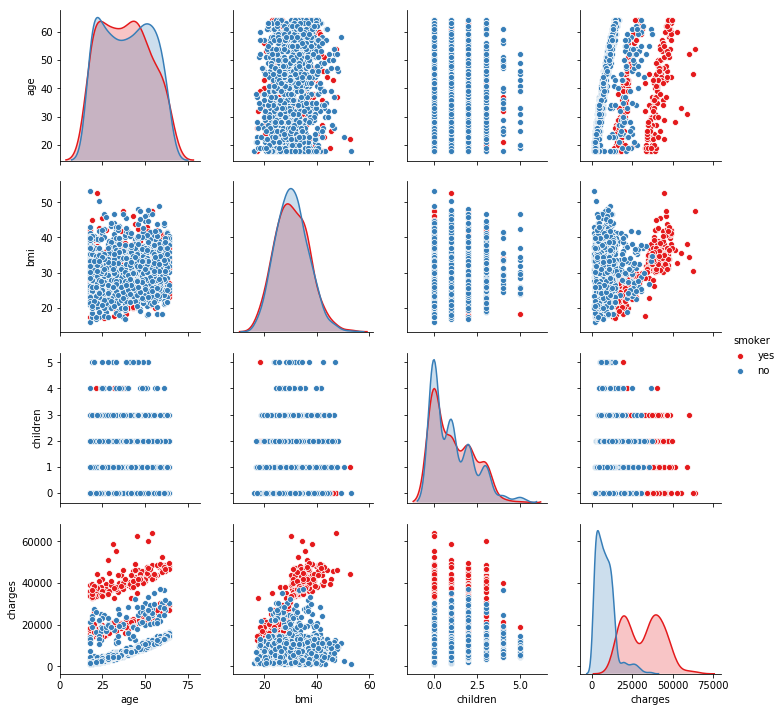

In [44]:
sns.pairplot(Insurance, hue='smoker', palette='Set1')

# Section 2 : Questions with Statistical Evidence

In [ ]:
# We have assumed Alpha=0.05

In [46]:
#Question 1 : Do charges of people who smoke differ significantly from the people who don't?

In [ ]:
#Hypothesis : 
#Ho : Mu(Charges of Smoker) = Mu(Charges of Non-Smoker)
#Ha : Mu(Charges of Smoker) not equal to Mu(Charges of Non Smoker)

In [164]:
Charges_smoker = Insurance["charges"].loc[Insurance["smoker"]=='yes']
Charges_nsmoker = Insurance["charges"].loc[Insurance["smoker"]=='no']


In [121]:
from    scipy.stats             import  ttest_1samp,ttest_ind, wilcoxon, ttest_ind_from_stats
import  scipy.stats             as      stats
from    scipy.stats             import chisquare

In [165]:
t_statistic, p_value  =  stats.ttest_ind(Charges_smoker, Charges_nsmoker)
print(t_statistic,p_value)   

46.664921172723716 8.271435842177219e-283


In [ ]:
#Conclusion : As P-value is very less than Alpa(0.05), we reject Null Hypothesis.

In [72]:
#Question 2 : Does bmi of males differ significantly from that of females?

In [ ]:
#Hypothesis
#Ho : Mu(Bmi of Males) = Mu(Bmi of Females)
#Ha : Mu(Bmi of Males) not equal to Mu(Bmi of Females)

In [166]:
Bmi_male = Insurance['bmi'].loc[Insurance['sex']=='male']
Bmi_female = Insurance['bmi'].loc[Insurance['sex']=='female']


In [167]:
t_statistic, p_value  =  stats.ttest_ind(Bmi_male,Bmi_female)
print(t_statistic,p_value)   

1.696752635752224 0.08997637178984932


In [ ]:
#Conclusion : As P-value is greater than Alpha(0.05), we Fail to reject Null Hypothesis

In [48]:
#Question 3 : Is the proportion of smokers significantly different in different genders?

In [ ]:
#Hypothesis :
#Ho : Proportion of Male smokers is identical to proportion of female smokers
#Ha : Proportion of Male smokers is significantly different to proportion of female smokers

In [201]:
Smoker = Insurance['smoker'].loc[(Insurance['sex']=='male') & (Insurance['smoker']=='yes')].count()

#Smoker

Smokerf = Insurance['smoker'].loc[(Insurance['sex']=='female') & (Insurance['smoker']=='yes')].count()
#Smokerf

Smoker_arr = np.array([Smoker, Smokerf])
#Smoker_arr

In [206]:
chisquare(Smoker_arr)

Power_divergenceResult(statistic=7.065693430656935, pvalue=0.007857389588994759)

In [ ]:
#Conclusion : As P-value is less than Alpha(0.05), we reject Null Hypothesis.

In [ ]:
#Question 4 : Is the distribution of bmi across women with no children, one child and two children , the same?

In [ ]:
#Hypothesis
#Ho : Mu(BMI_Female_No_Child) = Mu(BMI_Female_1_Child) = Mu(BMI_Female_2_Child)
#Ha : Mu(BMI_Female_No_Child) not equal to  Mu(BMI_Female_1_Child) not equal to  Mu(BMI_Female_2_Child)

In [212]:
bmi_female_child_0 = Insurance['bmi'].loc[(Insurance['sex']=='female') & (Insurance['children']== 0)]
bmi_female_child_1 = Insurance['bmi'].loc[(Insurance['sex']=='female') & (Insurance['children']== 1)]
bmi_female_child_2 = Insurance['bmi'].loc[(Insurance['sex']=='female') & (Insurance['children']== 2)]


In [213]:
stats.f_oneway(bmi_female_child_0,bmi_female_child_1,bmi_female_child_2)

F_onewayResult(statistic=0.3344720147757968, pvalue=0.7158579926754841)

In [ ]:
#Conclusion : As P-value is greater than Alpha(0.05), we Fail to reject the Null Hypothesis